# Johan Knarreborg 

## Research question/interests

I would like to look at how import the car is. It would also be interesting to see what the most dominating car and driver has been. 

In [1]:
#Importing libraries 
import pandas as pd 

#Importing the raw data
circuits = pd.read_csv("../data/raw/circuits.csv")
drivers = pd.read_csv("../data/raw/drivers.csv")
results = pd.read_csv("../data/raw/results.csv")
seasons = pd.read_csv("../data/raw/seasons.csv")
status = pd.read_csv("../data/raw/status.csv")
lap_times = pd.read_csv("../data/raw/lap_times.csv")
pit_stops = pd.read_csv("../data/raw/pit_stops.csv")
qualifying = pd.read_csv("../data/raw/qualifying.csv")
races = pd.read_csv("../data/raw/races.csv")
constructors = pd.read_csv("../data/raw/constructors.csv")
constructor_results = pd.read_csv("../data/raw/constructor_results.csv")
constructor_standings = pd.read_csv("../data/raw/constructor_standings.csv")
driver_standings = pd.read_csv("../data/raw/driver_standings.csv")

In [2]:
#cleaning the data 
print(races)

      raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1053    1069  2021     18         69  United States Grand Prix  2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix  2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix  2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix  2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix  2021-12-12   

          time                                                u

In [3]:
#same driver, same track  and their fastest lap through the years
#find the most used circuit
count = races.circuitId.value_counts()
print(count[0:1])
#Circuit 14 has been used the most with 71 races. 

14    71
Name: circuitId, dtype: int64


In [4]:
#Looking up circuit 14
print(circuits[13:14])

    circuitId circuitRef                          name location country  \
13         14      monza  Autodromo Nazionale di Monza    Monza   Italy   

        lat      lng  alt                                                url  
13  45.6156  9.28111  162  http://en.wikipedia.org/wiki/Autodromo_Naziona...  


In [5]:
#Making new dataframe merging results and what circuits 

In [6]:
races2= races.drop(["year","round","name","date","time","url"],axis=1)

In [7]:
results2 = pd.merge(results,races2,on="raceId",how="left")
print(results2)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25135     25141    1060       849              3      6    18       16   
25136     25142    1060        20            117      5    11       17   
25137     25143    1060       854            210     47    19       18   
25138     25144    1060       853            210      9    20       19   
25139     25145    1060       839            214     31    17       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1 

In [8]:
driverTop = results2.driverId.value_counts()
print(driverTop[0:10])

8      341
22     326
4      323
18     309
30     308
1      275
13     271
20     267
119    257
15     256
Name: driverId, dtype: int64


       resultId  raceId  driverId  constructorId number  grid position  \
276         277      31         8              6      1    14        9   
634         635      48         8              6      6     5        3   
1051       1052      67         8              1      3     1        2   
1417       1418      85         8              1      9    11        4   
7795       7796      13         8              6      4     3        3   
21521     21524     872         8            208      9     7        5   
21961     21964     892         8            208      7    11       11   
22399     22403     912         8              6      7    11        9   
22756     22760     938         8              6      7     2        5   
23201     23206     961         8              6      7     4        4   
23621     23626     981         8              6      7     5        5   
24038     24044    1002         8              6      7     1        2   
24772     24778    1038         8     

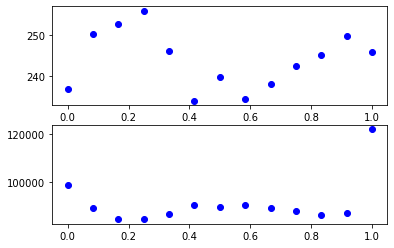

In [24]:
#driver 8 has been driving most races at the most raced track
import matplotlib.pyplot as plt 
import numpy as np
#plotting the fastest laptime and the average laptime for driver 8 for every race at track 14. 
driver8 = results2[results2["circuitId"]==14]
driver8 = driver8[driver8["driverId"]==8]
driver8 = driver8.drop([2137,2510,2870,1812,24474],axis=0)
print(driver8)
driver8["fastestLapSpeed"] = pd.to_numeric(driver8["fastestLapSpeed"], downcast="float")
driver8["milliseconds"] = pd.to_numeric(driver8["milliseconds"], downcast="float")
driver8["laps"] = pd.to_numeric(driver8["laps"], downcast="float")
fig, axs = plt.subplots(2)
axs[0].plot(np.linspace(0,1,len(driver8["fastestLapSpeed"])),driver8["fastestLapSpeed"],'bo')
axs[1].plot(np.linspace(0,1,len(driver8["fastestLapSpeed"])),driver8["milliseconds"]/driver8["laps"],'bo')
